In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
BTC = yf.download('BTC-USD', start='2022-12-22', end='2022-12-23',  interval = '1m') 

[*********************100%***********************]  1 of 1 completed


In [3]:
BTC    #Between the 22nd to 23rd of December 2022, there were 1,434 prices for both BTC and ETH

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-12-22 00:00:00,16818.380859,16818.380859,16818.380859,16818.380859,16818.380859,0
2022-12-22 00:01:00,16825.763672,16825.763672,16825.763672,16825.763672,16825.763672,0
2022-12-22 00:02:00,16824.031250,16824.031250,16824.031250,16824.031250,16824.031250,1409024
2022-12-22 00:03:00,16829.160156,16829.160156,16829.160156,16829.160156,16829.160156,0
2022-12-22 00:04:00,16829.492188,16829.492188,16829.492188,16829.492188,16829.492188,0
...,...,...,...,...,...,...
2022-12-22 23:54:00,16829.533203,16829.533203,16829.533203,16829.533203,16829.533203,1167360
2022-12-22 23:55:00,16828.492188,16828.492188,16828.492188,16828.492188,16828.492188,17562624
2022-12-22 23:56:00,16829.121094,16829.121094,16829.121094,16829.121094,16829.121094,0


In [4]:
ETH = yf.download('ETH-USD', start='2022-12-22', end='2022-12-23',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [5]:
ETH

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-12-22 00:00:00,1213.672607,1213.672607,1213.672607,1213.672607,1213.672607,0
2022-12-22 00:01:00,1214.051025,1214.051025,1214.051025,1214.051025,1214.051025,0
2022-12-22 00:02:00,1213.826782,1213.826782,1213.826782,1213.826782,1213.826782,0
2022-12-22 00:03:00,1214.177002,1214.177002,1214.177002,1214.177002,1214.177002,5888
2022-12-22 00:04:00,1214.120728,1214.120728,1214.120728,1214.120728,1214.120728,0
...,...,...,...,...,...,...
2022-12-22 23:54:00,1218.223511,1218.223511,1218.223511,1218.223511,1218.223511,523776
2022-12-22 23:55:00,1218.341797,1218.341797,1218.341797,1218.341797,1218.341797,4136960
2022-12-22 23:56:00,1218.353638,1218.353638,1218.353638,1218.353638,1218.353638,508416


In [6]:
S1_0 = BTC['Open'][0]
S2_0 = ETH['Open'][0]       

In [7]:
S1_0

16818.380859375

In [8]:
S2_0

1213.672607421875

In [9]:
BTC_lr = np.log(BTC['Adj Close'] / BTC['Adj Close'].shift(1))
ETH_lr = np.log(ETH['Adj Close'] / ETH['Adj Close'].shift(1))
BTC_mu = BTC_lr.mean() * 1434                #daily return
ETH_mu = ETH_lr.mean() * 1434                #daily return
BTC_sigma = BTC_lr.std() * np.sqrt(1434)     #daily sigma/volatility
ETH_sigma = ETH_lr.std() * np.sqrt(1434)     #daily sigma/volatility
rho = BTC_lr.corr(ETH_lr)                    #correlation
z_0 = 0.00                                   #starting point
gamma = 0.5                                  #risk averse parameter
delta = 1         
T = 1                                        #time, 1 day
M = len(ETH)

In [10]:
BTC_mu

0.0006369844529360043

In [11]:
ETH_mu

0.0036723937280563773

In [12]:
BTC_sigma

0.007598831208090518

In [13]:
ETH_sigma

0.014319298259977598

In [14]:
rho

0.8621801621939551

In [15]:
result = linregress(np.log(BTC['Adj Close']), np.log(ETH['Adj Close']))
beta = result.slope

In [16]:
beta

1.771247519213031

In [17]:
dt = T/M                            #time difference
S1 = np.zeros((M + 1, 1))           #underlying asset process S1     Process 1
S2 = np.zeros((M + 1, 1))           #underlying asset process S2     Process 2
z =  np.zeros((M + 1, 1))           #cointergration process          Process 3
a =  np.zeros((M + 1, 1))   
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
BTC_Pi = np.zeros((M + 1, 1))      #BTC weight
ETH_Pi = np.zeros((M + 1, 1))      #ETH weight

In [18]:
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(BTC_sigma ** 2 + beta ** 2 * ETH_sigma ** 2 + 2 * beta * BTC_sigma * ETH_sigma * rho)
eta = (-1/delta) * (BTC_mu - BTC_sigma ** 2/2 + beta*(ETH_mu - ETH_sigma ** 2/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((BTC_sigma + beta * ETH_sigma * rho)/ sigma_beta * rn1[t] + beta * (ETH_sigma * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = BTC['Adj Close'][t-1]
    S2[t] = ETH['Adj Close'][t-1]

Text(0.5, 1.0, 'Cryptocurrency Price')

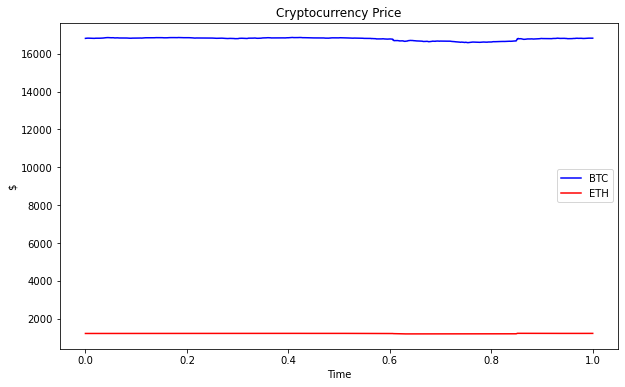

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S1, 'b', lw=1.5, label='BTC')
plt.plot(tt, S2, 'r', lw=1.5, label='ETH')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cryptocurrency Price')

Text(0.5, 1.0, 'z')

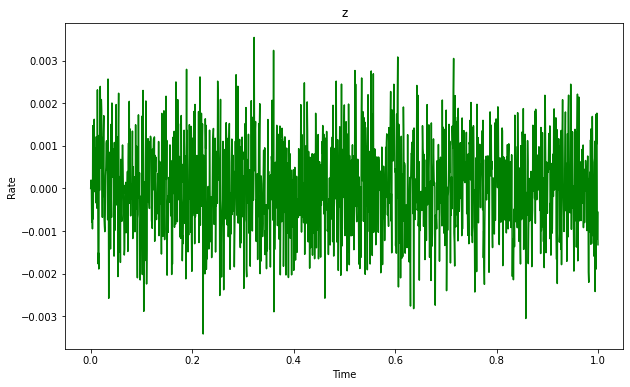

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('z')

In [21]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * BTC_sigma ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (BTC_sigma ** 2 + beta * ETH_sigma ** 2)/((1 - rho ** 2) * BTC_sigma ** 2) - rho * ETH_mu * (T - t * dt)/((1 - rho **2) * BTC_sigma * ETH_sigma)
    c[t] = 0.5 * ETH_mu ** 2 * (T - t * dt)/((1 - rho ** 2) * ETH_sigma ** 2) + 0.25 * (T - t * dt) ** 2 * (BTC_sigma ** 2 + beta * ETH_sigma ** 2 + 2 * BTC_sigma * ETH_sigma * beta *rho) * delta ** 2/((1 - rho ** 2) * BTC_sigma ** 2) + 0.25 * (T - t * dt) ** 2 * ETH_mu * delta * rho * (BTC_sigma ** 2 + beta * ETH_sigma ** 2) + 1/24 * (T - t * dt) ** 3 * (BTC_sigma ** 2 + beta * ETH_sigma ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * BTC_sigma ** 2)
    BTC_Pi[t] = (1 / S1[t]) * ((BTC_mu + delta * z[t])/(gamma * (1 - rho ** 2) * BTC_sigma ** 2) + delta/gamma * (-2 * a[t] * (BTC_mu + delta * z[t])-b[t]) - rho * ETH_mu/(gamma * (1 - rho ** 2) * BTC_sigma * ETH_sigma))
    ETH_Pi[t] = (1 / S2[t]) * (ETH_mu / (gamma * (1 - rho ** 2) * ETH_sigma ** 2) + delta * beta / gamma * (- 2 * a[t] * (BTC_mu + delta * z[t]) - b[t]) - rho * (BTC_mu + delta * z[t]) / (gamma * (1 - rho ** 2) * BTC_sigma * ETH_sigma))


### COMPUTATION OF OPTIMAL TRADING WEIGHTS

Text(0.5, 1.0, 'Weights')

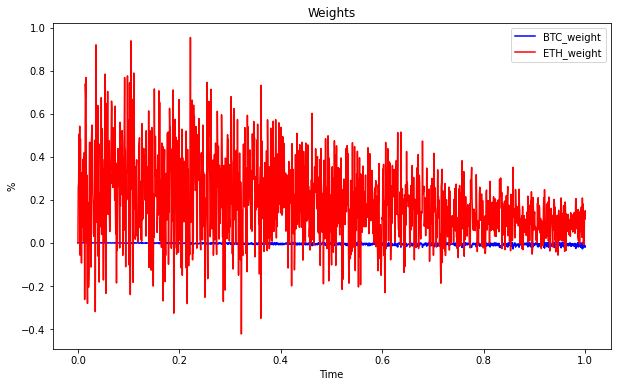

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(tt, BTC_Pi, 'b', lw=1.5, label='BTC_weight')
plt.plot(tt, ETH_Pi, 'r', lw=1.5, label='ETH_weight')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

### COMPUTATION OF OPTIMAL CASH AND CASH PROCESS

Text(0.5, 1.0, 'Wealth')

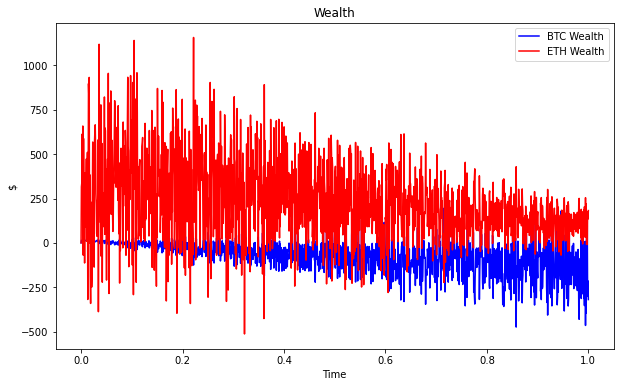

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(tt, BTC_Pi * S1, 'b', lw=1.5, label='BTC Wealth')
plt.plot(tt, ETH_Pi * S2, 'r', lw=1.5, label='ETH Wealth')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

In [25]:
Cash = abs(BTC_Pi * S1 + ETH_Pi * S2)

Text(0.5, 1.0, 'Total Cash Process')

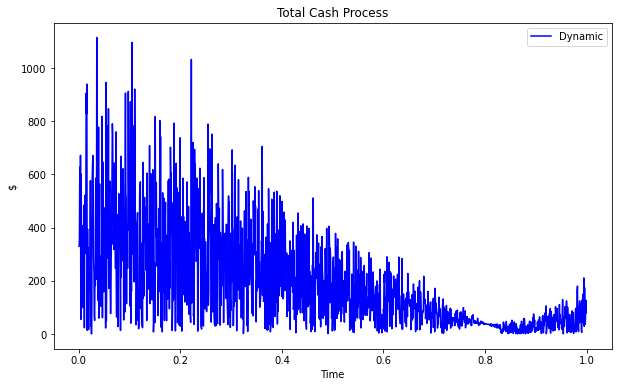

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:-1], Cash[1:-1], 'b', lw=1.5, label='Dynamic')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Total Cash Process')

In [27]:
(Cash[-1] - Cash[1])/Cash[1]     #Returns for the day

array([-0.58307378])

In [28]:
BTC_Pi.mean()

-0.003810621062527479

In [29]:
ETH_Pi.mean()

0.18798451098019142

Text(0.5, 1.0, 'Comparison')

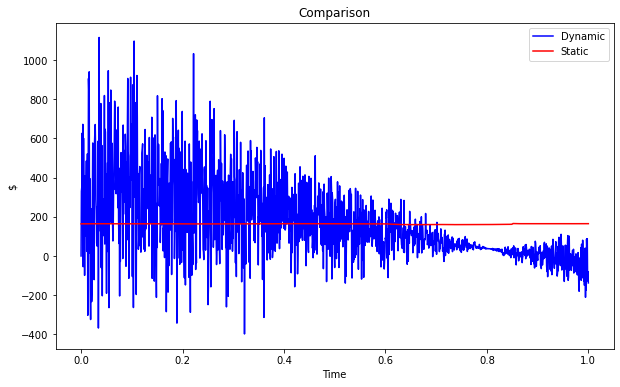

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(tt, BTC_Pi * S1 + ETH_Pi * S2, 'b', lw=1.5, label='Dynamic') 
plt.plot(tt, BTC_Pi.mean() * S1 + ETH_Pi.mean() * S2, 'r', lw=1.5, label='Static') 
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison')

## SIMULATION

In [31]:
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(BTC_sigma ** 2 + beta ** 2 * ETH_sigma ** 2 + 2 * beta * BTC_sigma * ETH_sigma * rho)
eta = (-1/delta) * (BTC_mu - BTC_sigma ** 2/2 + beta*(ETH_mu - ETH_sigma ** 2/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((BTC_sigma + beta * ETH_sigma * rho)/ sigma_beta * rn1[t] + beta * (ETH_sigma * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = BTC['Adj Close'][t-1]
    S2[t] = ETH['Adj Close'][t-1]

Text(0.5, 1.0, 'Cryptocurrency Price')

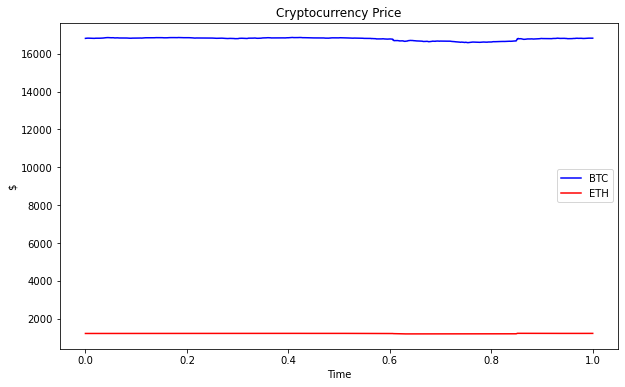

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S1, 'b', lw=1.5, label='BTC')
plt.plot(tt, S2, 'r', lw=1.5, label='ETH')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cryptocurrency Price')

Text(0.5, 1.0, 'z')

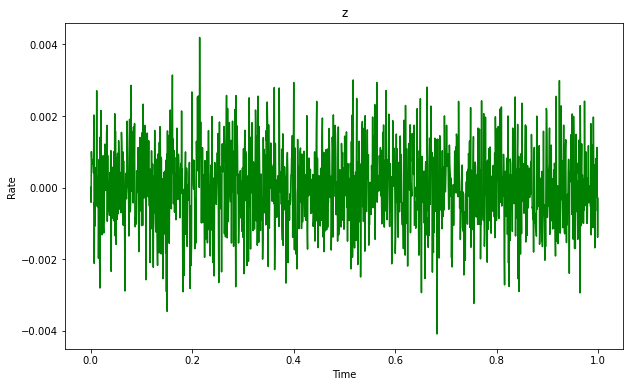

In [33]:
#Cointegration factor
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('z')

In [34]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * BTC_sigma ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (BTC_sigma ** 2 + beta * ETH_sigma ** 2)/((1 - rho ** 2) * BTC_sigma ** 2) - rho * ETH_mu * (T - t * dt)/((1 - rho **2) * BTC_sigma * ETH_sigma)
    c[t] = 0.5 * ETH_mu ** 2 * (T - t * dt)/((1 - rho ** 2) * ETH_sigma ** 2) + 0.25 * (T - t * dt) ** 2 * (BTC_sigma ** 2 + beta * ETH_sigma ** 2 + 2 * BTC_sigma * ETH_sigma * beta *rho) * delta ** 2/((1 - rho ** 2) * BTC_sigma ** 2) + 0.25 * (T - t * dt) ** 2 * ETH_mu * delta * rho * (BTC_sigma ** 2 + beta * ETH_sigma ** 2) + 1/24 * (T - t * dt) ** 3 * (BTC_sigma ** 2 + beta * ETH_sigma ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * BTC_sigma ** 2)
    BTC_Pi[t] = (1 / S1[t]) * ((BTC_mu + delta * z[t])/(gamma * (1 - rho ** 2) * BTC_sigma ** 2) + delta/gamma * (-2 * a[t] * (BTC_mu + delta * z[t])-b[t]) - rho * ETH_mu/(gamma * (1 - rho ** 2) * BTC_sigma * ETH_sigma))
    ETH_Pi[t] = (1 / S2[t]) * (ETH_mu / (gamma * (1 - rho ** 2) * ETH_sigma ** 2) + delta * beta / gamma * (- 2 * a[t] * (BTC_mu + delta * z[t]) - b[t]) - rho * (BTC_mu + delta * z[t]) / (gamma * (1 - rho ** 2) * BTC_sigma * ETH_sigma))


Text(0.5, 1.0, 'Weights')

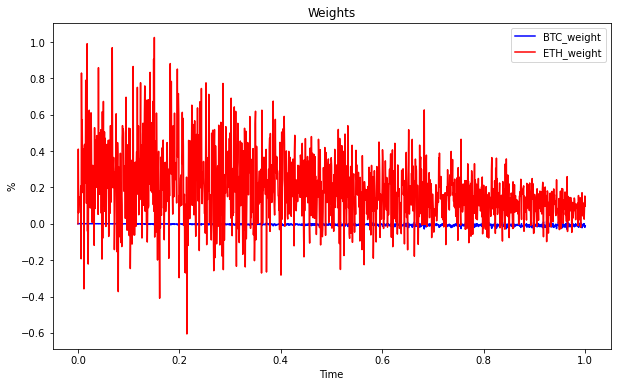

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(tt, BTC_Pi, 'b', lw=1.5, label='BTC_weight')
plt.plot(tt, ETH_Pi, 'r', lw=1.5, label='ETH_weight')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

Text(0.5, 1.0, 'Wealth')

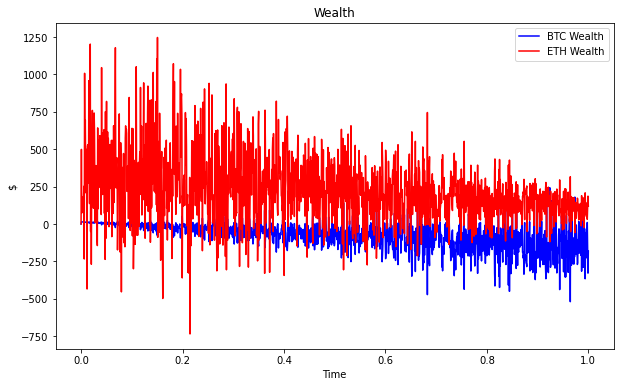

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(tt, BTC_Pi * S1, 'b', lw=1.5, label='BTC Wealth')
plt.plot(tt, ETH_Pi * S2, 'r', lw=1.5, label='ETH Wealth')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

In [37]:
Cash = abs(BTC_Pi * S1 + ETH_Pi * S2)

Text(0.5, 1.0, 'Total Cash Process')

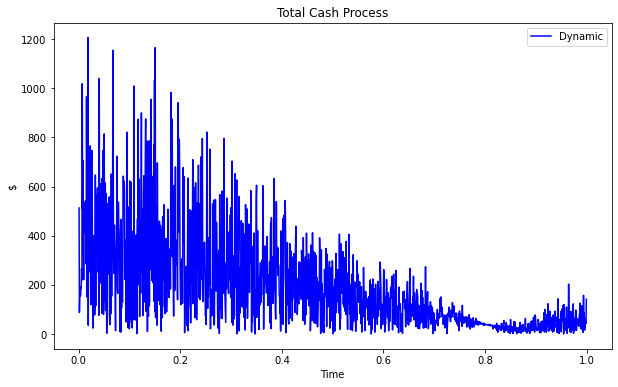

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:-1], Cash[1:-1], 'b', lw=1.5, label='Dynamic')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Total Cash Process')

In [39]:
(Cash[-1] - Cash[1])/Cash[1]

array([-0.87766629])

In [40]:
BTC_Pi.mean()

-0.003886117383403073

In [41]:
ETH_Pi.mean()

0.1881824585578813

Text(0.5, 1.0, 'Comparison')

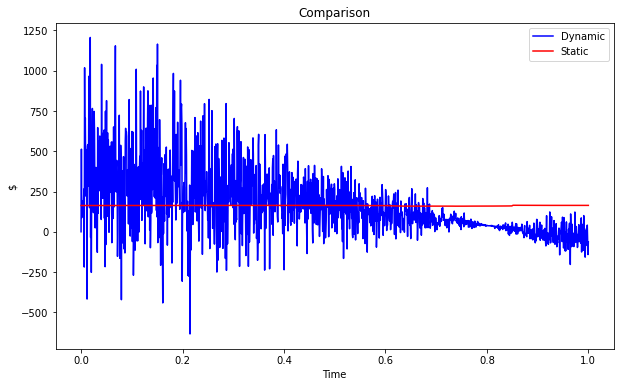

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(tt, BTC_Pi * S1 + ETH_Pi * S2, 'b', lw=1.5, label='Dynamic') 
plt.plot(tt, BTC_Pi.mean() * S1 + ETH_Pi.mean() * S2, 'r', lw=1.5, label='Static') 
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison')